In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.examples.tutorials.mnist import input_data
import os
import vae

In [2]:
dim_x = 784
dim_y = 10
dim_z = 2
n_hidden = 500
learn_rate = 1e-3

mnist = input_data.read_data_sets('MNIST_data', one_hot=False)
num_examples = mnist.train.num_examples
n_epochs = 50
batch_size = 50
total_batch = int(num_examples / batch_size)

ADD_NOISE = False


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [29]:
tf.reset_default_graph()
""" build graph """
# input placeholders
# In denoising-autoencoder, x_hat == x + noise, otherwise x_hat == x
x_hat = tf.placeholder(tf.float32, shape=[None, dim_x], name='input_img')
x = tf.placeholder(tf.float32, shape=[None, dim_x], name='target_img')
y = tf.placeholder(tf.int32, shape=[None], name='target_labels')
y_one_hot = tf.one_hot(indices = y, depth=dim_y)

# dropout
keep_prob = tf.placeholder(tf.float32, name='keep_prob')

# input for PMLR
z_in = tf.placeholder(tf.float32, shape=[None, dim_z], name='latent_variable')
fack_id_in = tf.placeholder(tf.float32, shape=[None, dim_y], name='latent_variable') # condition

# network architecture
x_, z, loss, neg_marginal_likelihood, KL_divergence = vae.autoencoder(x_hat, x, y_one_hot, dim_x, dim_z, n_hidden, keep_prob)

global_step = tf.contrib.framework.get_or_create_global_step()

# optimization
train_op = tf.train.AdamOptimizer(learn_rate).minimize(loss, global_step=global_step)

saver = tf.train.Saver(max_to_keep=3)

In [42]:

# model_dir = 'models/cvae01'
# model_dir = 'models/cvae'
model_dir = 'models/cvaenat'

checkpoint = tf.train.latest_checkpoint(model_dir)



In [43]:
config = tf.ConfigProto()
config.log_device_placement=False
config.allow_soft_placement=True
config.gpu_options.allow_growth=True
session = tf.Session(config=config)
session.run(tf.global_variables_initializer())

In [44]:
saver.restore(session, checkpoint)

INFO:tensorflow:Restoring parameters from models/cvaenat/checkpoint-219901


In [45]:
import PIL
import matplotlib.pyplot as plt

def preprocess(img):
    img = np.array(img, dtype = 'float')
    img = img.reshape(1, 784)/255
    return img


In [84]:
# root = "./features/01/"
root = "./features/02/"
# root = "./features/nat/"

train_path = root + "feature_attributions.npy"

feature_attributions = np.load(train_path)
mnist = input_data.read_data_sets('MNIST_data', one_hot=False)
labels = mnist.train.labels
train_total_data = np.column_stack((feature_attributions,labels))

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [85]:
path = root + "adv_attr/"

path_test_imgs = path + "test_imgs.npy"
path_adv_imgs = path + "adv_imgs.npy"
path_adv_attr = path + "adv_attr.npy"
path_test_attr = path + "test_attr.npy"
path_adv_labels = path + "adv_labels.npy"

# Setting up the data and the model
test_imgs = np.load(path_test_imgs)
test_attr = np.load(path_test_attr)
adv_imgs = np.load(path_adv_imgs)
adv_attr = np.load(path_adv_attr)
adv_labels = np.load(path_adv_labels)

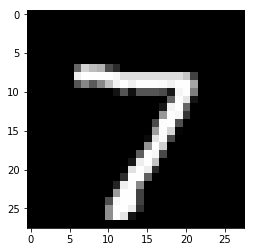

In [86]:
idx = 0
plt.imshow(np.reshape(test_imgs[idx],[28,28]), cmap='Greys_r')

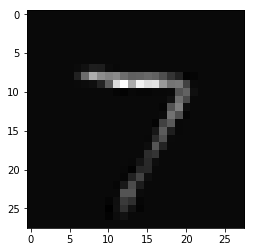

In [87]:
plt.imshow(np.reshape(test_attr[idx],[28,28]), cmap='Greys_r')

3

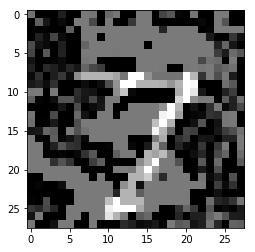

In [89]:
plt.imshow(np.reshape(adv_imgs[idx],[28,28]), cmap='Greys_r')
adv_labels[idx]

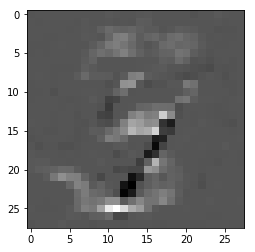

In [90]:

plt.imshow(np.reshape(adv_attr[idx],[28,28]), cmap='Greys_r')


9.372604
0.00023001432


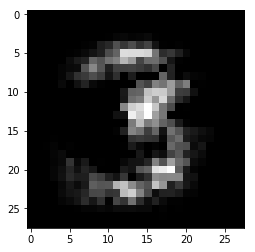

In [91]:
output,l_tot, l_likelyhood, l_KL = session.run(
    (x_, loss, neg_marginal_likelihood, KL_divergence),
    feed_dict={x_hat: adv_attr[idx], x: adv_attr[idx], y: [adv_labels[idx]], keep_prob : 1})
plt.imshow(np.reshape(output,[28,28]), cmap='Greys_r')
print(l_tot)
print(l_KL)

7.594157
0.00013172626


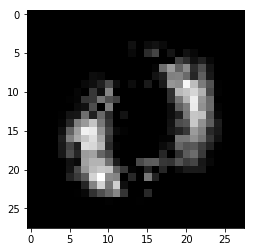

In [94]:
output,l_tot, l_likelyhood, l_KL = session.run(
    (x_, loss, neg_marginal_likelihood, KL_divergence),
    feed_dict={x_hat: [test_attr[3]], x: [test_attr[3]], y: [0], keep_prob : 1})
plt.imshow(np.reshape(output,[28,28]), cmap='Greys_r')
print(l_tot)
print(l_KL)

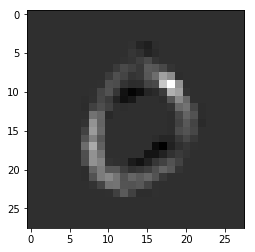

In [95]:
plt.imshow(np.reshape(test_attr[3],[28,28]), cmap='Greys_r')

In [33]:
for idx in range(50):
    print(np.min(adv_attr[idx]))
    print(np.max(adv_attr[idx]))
    print(np.mean(adv_attr[idx]))
    print(np.std(adv_attr[idx]))
    print('=========')

-0.025704944506287575
0.04489503055810928
0.0012582271579721718
0.005725333646093887
-0.031884578956599796
0.07830360531806946
0.001224845877229283
0.00769370381283527
-0.011822069577662742
0.03824242204427719
0.001263003893283358
0.003963265226813654
-0.03400597348809242
0.04737090838226799
0.0012505874052547348
0.00786913808294079
-0.028259528492321717
0.07380343228578568
0.0012496636018562595
0.006625515827281419
-0.0508244051886404
0.043038010597229004
0.0011357226502350457
0.006241348886724122
-0.021620732932395526
0.04118924215435982
0.0012675952950494764
0.004932503386176967
-0.03506501127310635
0.043468259209614946
0.0012705020341793403
0.006113994900514346
-0.0327608620682911
0.05086866393685341
0.001250235196697536
0.00715725540801362
-0.03403965771745954
0.0690121054649353
0.001269183783034233
0.007331307171430382
-0.0328494051316337
0.04438314959406853
0.001262851341400558
0.0062666116792740156
-0.021594752633340767
0.035575881600379944
0.0012791655334156494
0.0047142687205